## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = mouse_metadata.merge(study_results,on='Mouse ID')

# Display the data table for preview
full_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
ID_grouped = full_data.groupby('Mouse ID')
countBy_ID = ID_grouped.count()['Sex']
total_mice = len(countBy_ID)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = full_data[full_data.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
duplicate_id = duplicate_data.iloc[0]['Mouse ID']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_data[full_data['Mouse ID']!=duplicate_id]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_grouped = clean_df.groupby('Drug Regimen')
mean_vol_drug   = pd.DataFrame(drug_grouped['Tumor Volume (mm3)'].mean())
mean_vol_drug.rename(columns={'Tumor Volume (mm3)':'Mean'},inplace=True)
median_vol_drug = pd.DataFrame(drug_grouped['Tumor Volume (mm3)'].median())
median_vol_drug.rename(columns={'Tumor Volume (mm3)':'Median'},inplace=True)
var_vol_drug    = pd.DataFrame(drug_grouped['Tumor Volume (mm3)'].var())
var_vol_drug.rename(columns={'Tumor Volume (mm3)':'Variance'},inplace=True)
std_vol_drug    = pd.DataFrame(drug_grouped['Tumor Volume (mm3)'].std())
std_vol_drug.rename(columns={'Tumor Volume (mm3)':'STD'},inplace=True)
sem_vol_drug    = pd.DataFrame(drug_grouped['Tumor Volume (mm3)'].sem())
sem_vol_drug.rename(columns={'Tumor Volume (mm3)':'SEM'},inplace=True)
drug_vol_summary_naive = pd.concat([mean_vol_drug,median_vol_drug,var_vol_drug,std_vol_drug,sem_vol_drug],axis=1)
drug_vol_summary_naive

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_vol_summary= drug_grouped['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_vol_summary.rename(columns={'mean':'Mean','median':'Median','var':'Variance',
                            'std':'STD','sem':'SEM'},inplace=True)
drug_vol_summary

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

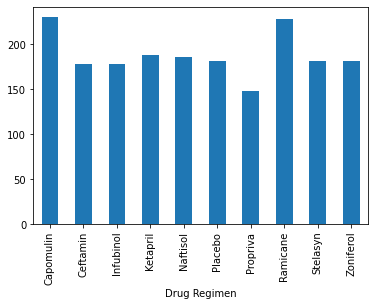

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_mesurments = drug_grouped.count()['Timepoint']
count_mesurments.plot.bar()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

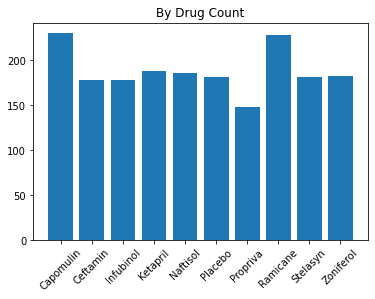

In [180]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_mesurments = drug_grouped.count()['Timepoint']
labels = count_mesurments.index.values
plt.bar(count_mesurments.index.values,count_mesurments.values)
plt.title('By Drug Count')
plt.xticks( rotation = 45)

<AxesSubplot:ylabel='Timepoint'>

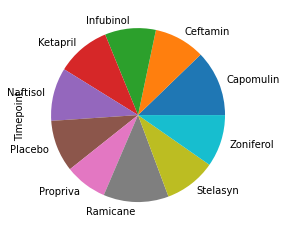

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_mesurments.plot.pie()

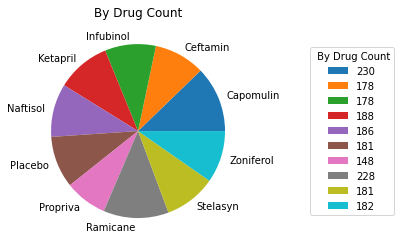

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count_mesurments = drug_grouped.count()['Timepoint']
labels = count_mesurments.index.values
plt.pie(count_mesurments,labels =labels)
plt.title('By Drug Count')
labels = count_mesurments.values
plt.legend(count_mesurments.values,title = " By Drug Count",loc="center right",bbox_to_anchor=(1, 0, 0.7, 1))


## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_ID = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint = pd.merge(clean_df,last_timepoint_ID,on=['Mouse ID','Timepoint'],how='inner')
max_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
max_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = max_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]}")

outlayer_df = pd.DataFrame(columns=max_timepoint.columns)
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mask_drug   = max_timepoint['Drug Regimen']==drug
    mask_lowerq = max_timepoint['Tumor Volume (mm3)']<lowerq
    mask_upperq = max_timepoint['Tumor Volume (mm3)']>upperq
    # add subset 
    # Determine outliers using upper and lower bounds
    lowerq_df = max_timepoint[mask_lowerq & mask_drug]
    upperq_df = max_timepoint[mask_upperq & mask_drug]
    temp_df   = pd.merge(lowerq_df ,upperq_df,how='outer')
    outlayer_df = outlayer_df.merge(temp_df,how = 'outer')
outlayer_df.head()

The lower quartile of Volume is: 45.8758668475
The upper quartile of Volume is: 65.05362410500001
The interquartile range of Volume is: 19.177757257500012
The the median of Volume is: 55.793278175


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


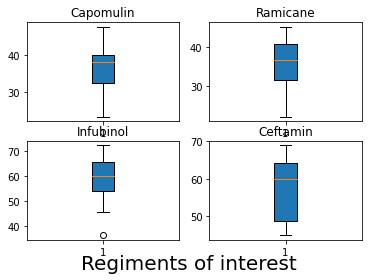

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig,a =  plt.subplots(2,2)
fig.supxlabel('Regiments of interest',fontsize=20)
data = max_timepoint[max_timepoint['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
a[0][0].boxplot(data,patch_artist=True)
a[0][0].set_title('Capomulin')
data = max_timepoint[max_timepoint['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
a[0][1].boxplot(data,patch_artist=True,)
a[0][1].set_title('Ramicane')
data = max_timepoint[max_timepoint['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
a[1][0].boxplot(data,patch_artist=True,)
a[1][0].set_title('Infubinol')
data = max_timepoint[max_timepoint['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
a[1][1].boxplot(data,patch_artist=True,)
a[1][1].set_title('Ceftamin')
plt.show()

## Line and Scatter Plots

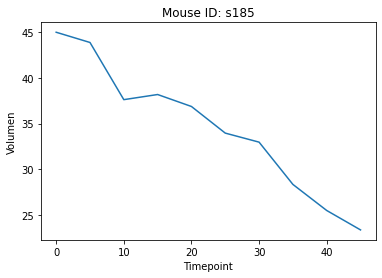

In [151]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_mouse = clean_df[clean_df['Mouse ID']== 's185']
plt.plot(s185_mouse['Timepoint'],s185_mouse['Tumor Volume (mm3)'])
plt.title('Mouse ID: s185')
plt.xlabel('Timepoint')
plt.ylabel('Volumen')
plt.show()

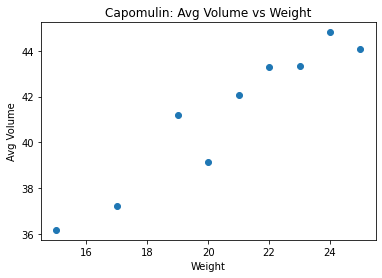

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen']== 'Capomulin']
weight_grouped = capomulin_df.groupby('Weight (g)')
plt.scatter(weight_grouped.mean().index,weight_grouped.mean()['Tumor Volume (mm3)'])
plt.title('Capomulin: Avg Volume vs Weight')
plt.xlabel('Weight')
plt.ylabel('Avg Volume')
plt.show()

## Correlation and Regression

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

res = st.linregress(weight_grouped.mean().index, weight_grouped.mean()['Tumor Volume (mm3)'])
line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
print(f'Linear regression model for weight and Avg tumor volume: {line_eq}')

Linear regression model for weight and Avg tumor volume: y = 0.89x + 22.76


In [175]:
corr_vol_weight = capomulin_df.corr()['Tumor Volume (mm3)']['Weight (g)']
print(f'Correlation coefficient for weight and Avg tumor volume: {corr_vol_weight}')

Correlation coefficient for weight and Avg tumor volume: 0.5256995552077153
